# Modelos de regresión linea
## modelo con datos simulados

* y= a+b*x
* x: 100 valores distribuidos segun una N(1.5, 2.5)  (media,desviación)
* Ye = 5+1.9*x+e
* e estara distribuido segun una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
x= 1.5 + 2.5*np.random.randn(100)   # fijamos la media y desviación de una distribución normal de numeros

In [4]:
res = 0 + 0.8 * np.random.randn(100)  #fijamos los residuos con media en 0 y desv de 0.8

In [5]:
y_pred=5+1.9*x                # La predicción está definida por la curva que pensamos que es

In [6]:
y_act = 5+1.9*x+res           # Los datos "reales" presentan un residuo adicional

In [7]:
#convertimos todo a lista, para poder trabajar con pandas
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()

In [8]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    })

In [9]:
data.head()

,x,y_actual,y_prediccion
0,5.910131,17.735769,16.229249
1,2.500393,8.672539,9.750747
2,3.946845,11.482617,12.499005
3,7.102233,19.269760,18.494243
4,6.168895,15.782402,16.720900


**Lo que estamos viendo aqui es ver que tan preciso es la prediccion del modelo que ya está realizado.**

In [10]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]  ## veamos el promedio de y_act

In [11]:
%matplotlib inline

Text(0.5, 1.0, 'Valor actual vs Predicción')

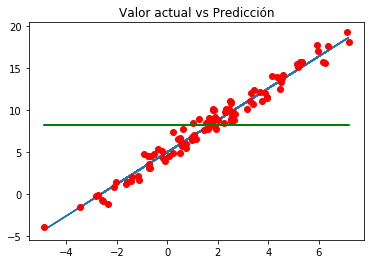

In [12]:
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs Predicción")

In [13]:
data["SSR"]=(data["y_prediccion"]-y_mean)**2                #suma de los cuadrados de la regresión, mean-pred
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2      #suma de los cuadrados de la diferencia entre y_ac e y_p
data["SST"]=(data["y_actual"]-y_mean)**2 #suma de los cuadrados totales

**Se tiene que SST=SSR+SSD**

In [14]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,5.910131,17.735769,16.229249,64.473676,2.269604,90.936645
1,2.500393,8.672539,9.750747,2.405751,1.162531,0.223579
2,3.946845,11.482617,12.499005,18.484040,1.033045,10.777557
3,7.102233,19.269760,18.494243,105.977641,0.601427,122.546264
4,6.168895,15.782402,16.720900,72.610884,0.880780,57.497389


In [15]:
SSR= sum(data["SSR"])
SSD= sum(data["SSD"])
SST= sum(data["SST"])

In [16]:
SSR

2292.389281755426

In [17]:
SSD

68.94476306938411

In [18]:
SST

2449.023529225125

In [19]:
SSD+SSR

2361.33404482481

In [20]:
R2= SSR/SST
R2                      #buen valor! 0.9883 esto dice que es un buen modelo, pero no es suficiente totalmente

0.9360421630905039

(array([ 5.,  7.,  5., 19., 12., 12., 19., 14.,  6.,  1.]),
 array([-1.90651582, -1.53799199, -1.16946815, -0.80094432, -0.43242048,
        -0.06389665,  0.30462719,  0.67315102,  1.04167485,  1.41019869,
         1.77872252]),
 <a list of 10 Patch objects>)

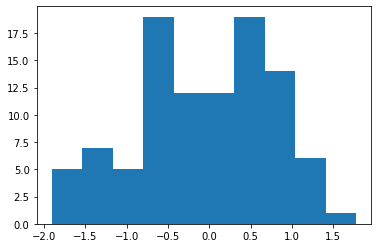

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])  # se ve una distribución normal centrada en 0

**Hemos estudiado como se comporta esa recta ficticia que nos hemos inventado, sin embargo siempre 
o casi siempre querremos encontrar nosotros los parámetros de la recta**

# Obteniendo la Recta de Regresión


* y = a +b*x
* b= sum((x_i - x_m)*(y_i - y_m))/sum((x_i - x_m)^2)
* a= y_m - b* x_m

donde el subindice m representa el promedio y el subindice i representa el i-esimo dato

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean , y_mean

(1.6495200388362128, 8.19969845038707)

**Calculando b**

In [23]:
data["b_n"]=(data["x"]-x_mean)*(data["y_actual"]-y_mean)   # hacer siempre separado, para evitar error
data["b_d"]=(data["x"]-x_mean)**2                          # tanto el denominador como el numerador
b_total= sum(data["b_n"])/sum(data["b_d"])

**Calculando a**

In [24]:
a = (y_mean-b_total*x_mean)

In [25]:
a, b_total

(5.005067219939744, 1.936703498734842)

El modelo lineal obtenido por regresión es: **y =  5.005067219939744 + 1.936703498734842* x**

In [26]:
data["y_model"]=a+b_total*data["x"]

In [27]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,b_n,b_d,y_model
0,5.910131,17.735769,16.229249,64.473676,2.269604,90.936645,40.629486,18.152805,16.451238
1,2.500393,8.672539,9.750747,2.405751,1.162531,0.223579,0.402328,0.723985,9.847587
2,3.946845,11.482617,12.499005,18.484040,1.033045,10.777557,7.541932,5.277702,12.648936
3,7.102233,19.269760,18.494243,105.977641,0.601427,122.546264,60.361868,29.732079,18.759987
4,6.168895,15.782402,16.720900,72.610884,0.880780,57.497389,34.269079,20.424750,16.952388


Veamos ahora si nuestro modelo es mejor que el que estaba predefinido arriba

In [28]:
SSR_MODEL=sum((data["y_model"]-y_mean)**2)                #suma de los cuadrados de la regresión, mean-pred
SSD_MODEL=sum((data["y_model"]-data["y_actual"])**2)      #suma de los cuadrados de la diferencia entre y_ac e y_p
SST_MODEL=sum((data["y_actual"]-y_mean)**2)               #suma de los cuadrados totales

In [29]:
SSD_MODEL,SSR_MODEL,SST_MODEL

(67.65899866820027, 2381.364530556924, 2449.0235292251255)

In [30]:
R2_MODEL=SSR_MODEL/SST_MODEL
R2_MODEL , R2

(0.9723730712013171, 0.9360421630905039)

Text(0.5, 1.0, 'Valor actual vs Predicción')

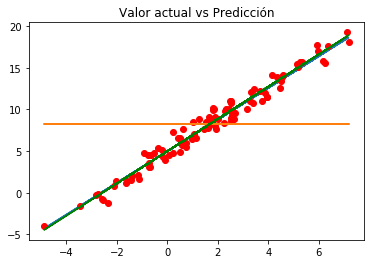

In [31]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]  ## veamos el promedio de y_act
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,)
plt.plot(x,data["y_model"],"g")
plt.title("Valor actual vs Predicción")

Vemos que es casi la misma linea, hay una verde y azul sobrepuesta, son casi identicos los modelos

# Error estándar de los residuos (RSE)

In [35]:
RSE= np.sqrt(SSD_MODEL/(len(data)-2))
RSE

0.8309018868638345

Entre menor sea es mejor el modelo, en comparación con el promedio

In [36]:
np.mean(data["y_actual"])

8.19969845038707

In [38]:
print("el porcentaje de error es: ", RSE/np.mean(data["y_actual"]) *100) 


el porcentaje de error es:  10.1333224860801
